#Importing Dependencies

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
import zipfile
import os

# Path to the zip files in Google Drive
zip_path = 'diabetes.zip'
# Destination folder
extract_path = '/content/'

# Unzipping
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

## Data Preprocessing

In [55]:
df = pd.read_csv('/content/diabetes.csv')

In [56]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [59]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [60]:
df.shape


(768, 9)

In [61]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
12           140      82             43             325      39.2  0.528                     58   1          1
             121      78             17             0        26.5  0.259                     62   0          1
             106      80             0              0        23.6  0.137                     44   0          1
             100      84             33             105      30.0  0.488                     46   0          1
             92       62             7              258      27.6  0.926                     44   1          1
                                                                                                            ..
0            78       88             29             40       36.9  0.434                     21   0          1
             74       52             10             36       27.8  0.269                     22   0          1
             73       0              0              0        21.1  0.342                     25   0          1
             67       76             0              0        45.3  0.194                     46   0          1
             57       60             0              0        21.7  0.735                     67   0          1
Name: count, Length: 768, dtype: int64

# Exploratory Data Analysis (EDA)

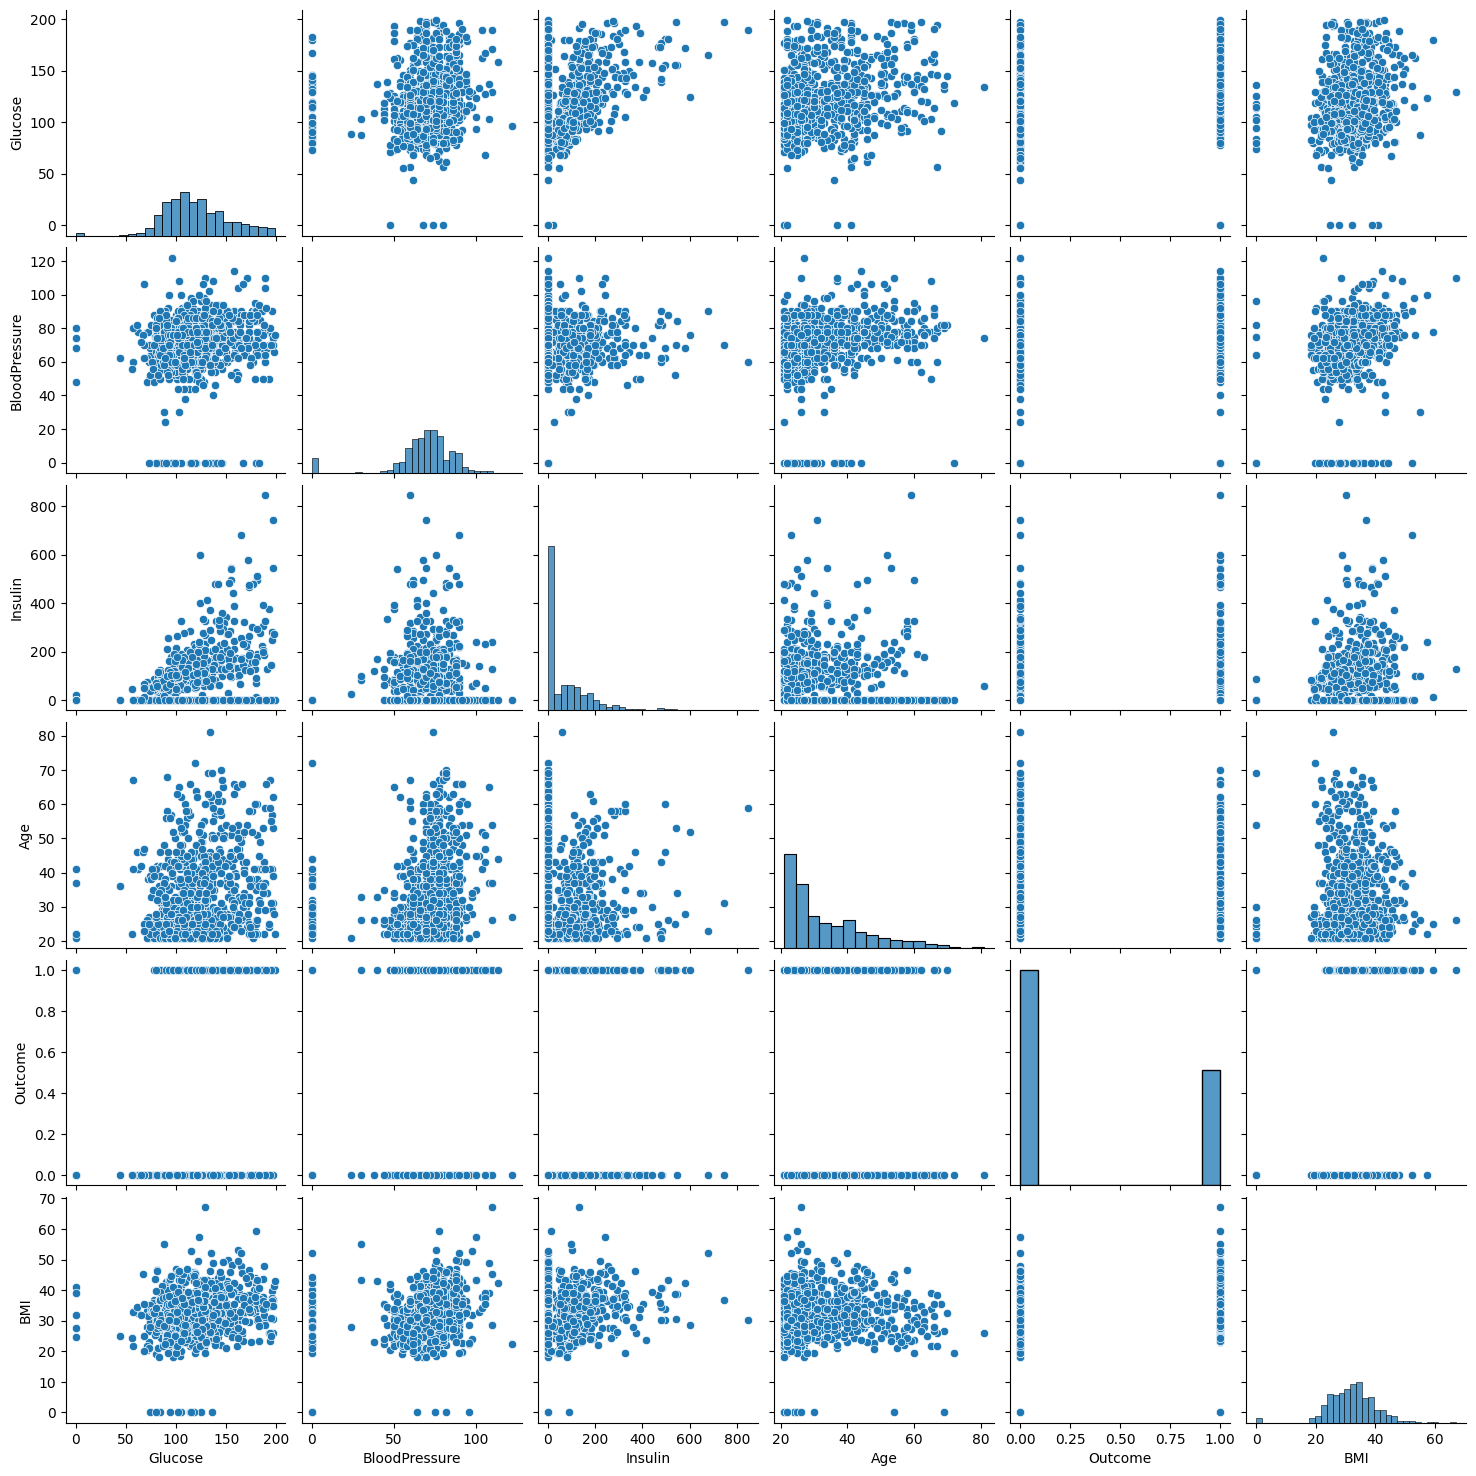

In [62]:
#pairplot
mean_col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']
sns.pairplot(df[mean_col])


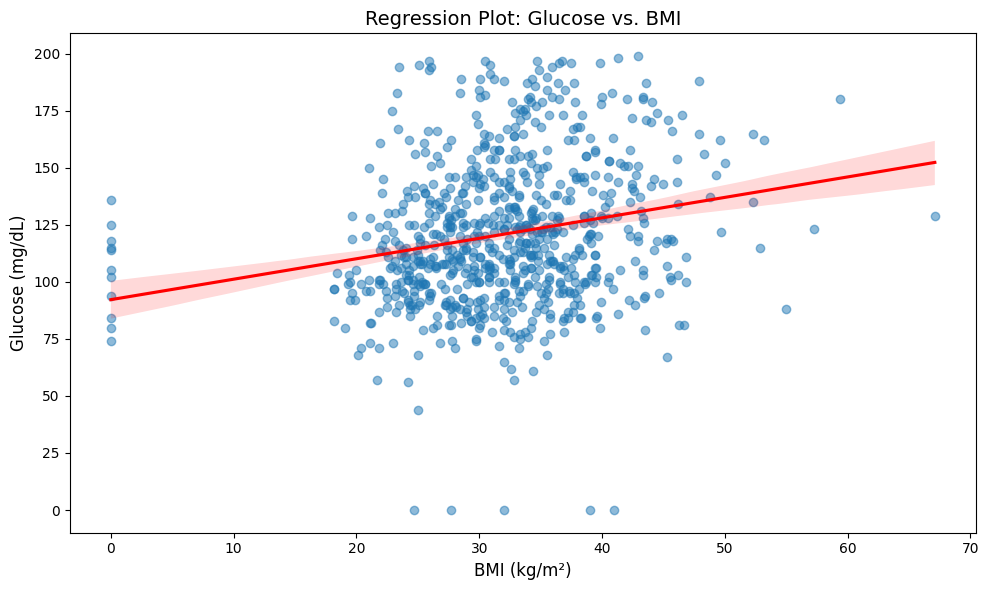

Pearson Correlation Coefficient: 0.221
P-value: 0.000


In [63]:

# Assuming df is your DataFrame
# Create a regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='BMI', y='Glucose', data=df, ci=95, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Add titles and labels
plt.title("Regression Plot: Glucose vs. BMI", fontsize=14)
plt.xlabel("BMI (kg/m²)", fontsize=12)
plt.ylabel("Glucose (mg/dL)", fontsize=12)

# Display the plot
plt.show()

# Calculate Pearson correlation and p-value
from scipy.stats import pearsonr
correlation, p_value = pearsonr(df['BMI'], df['Glucose'])
print(f"Pearson Correlation Coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

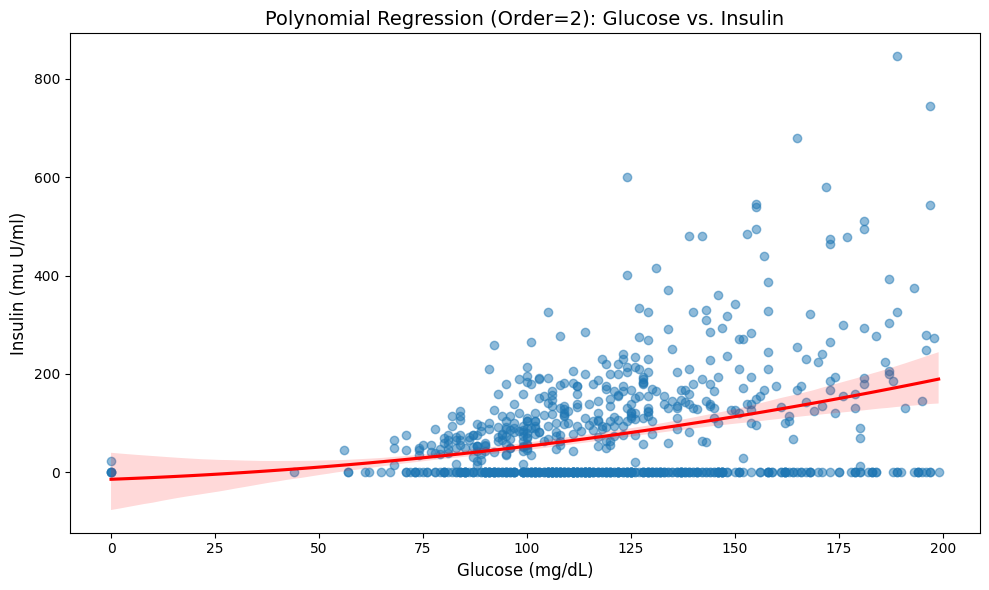

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Polynomial regression plot (order=2 for quadratic)
plt.figure(figsize=(10, 6))
sns.regplot(x='Glucose', y='Insulin', data=df, ci=95, order=2,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Polynomial Regression (Order=2): Glucose vs. Insulin", fontsize=14)
plt.xlabel("Glucose (mg/dL)", fontsize=12)
plt.ylabel("Insulin (mu U/ml)", fontsize=12)
plt.show()

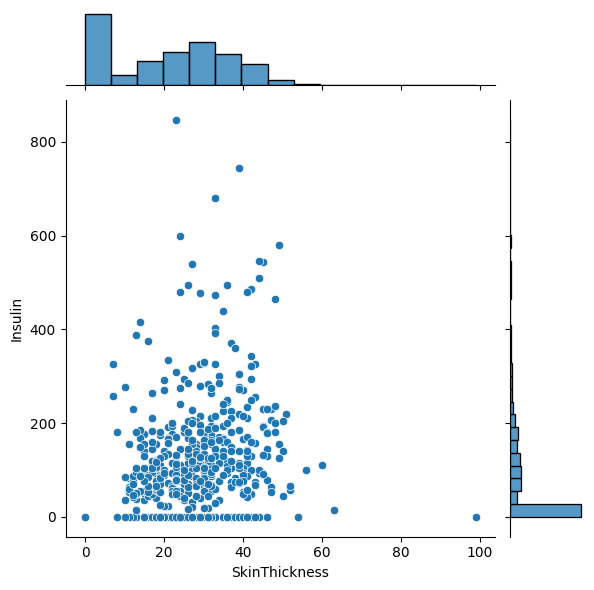

In [65]:
sns.jointplot(x='SkinThickness', y='Insulin', data=df)


In [66]:
df.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


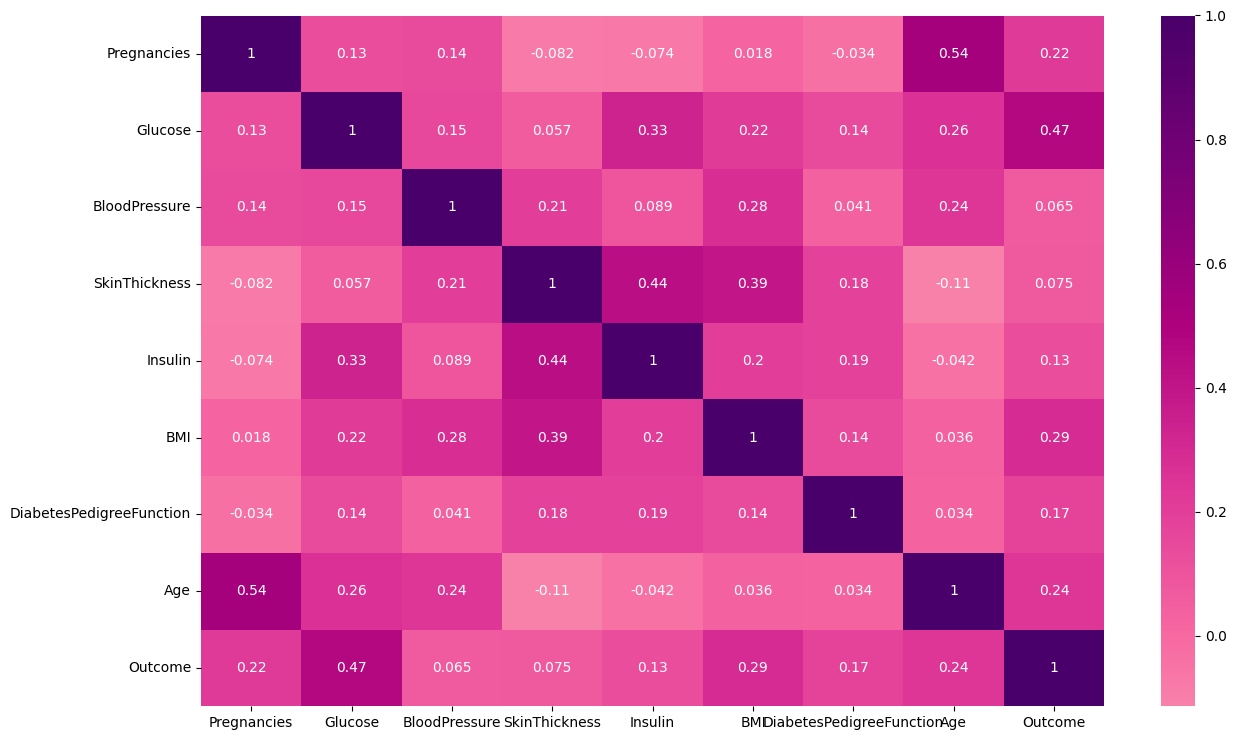

In [67]:
dataplot = sns.heatmap(df.corr(), cmap='RdPu', annot=True, center=0)


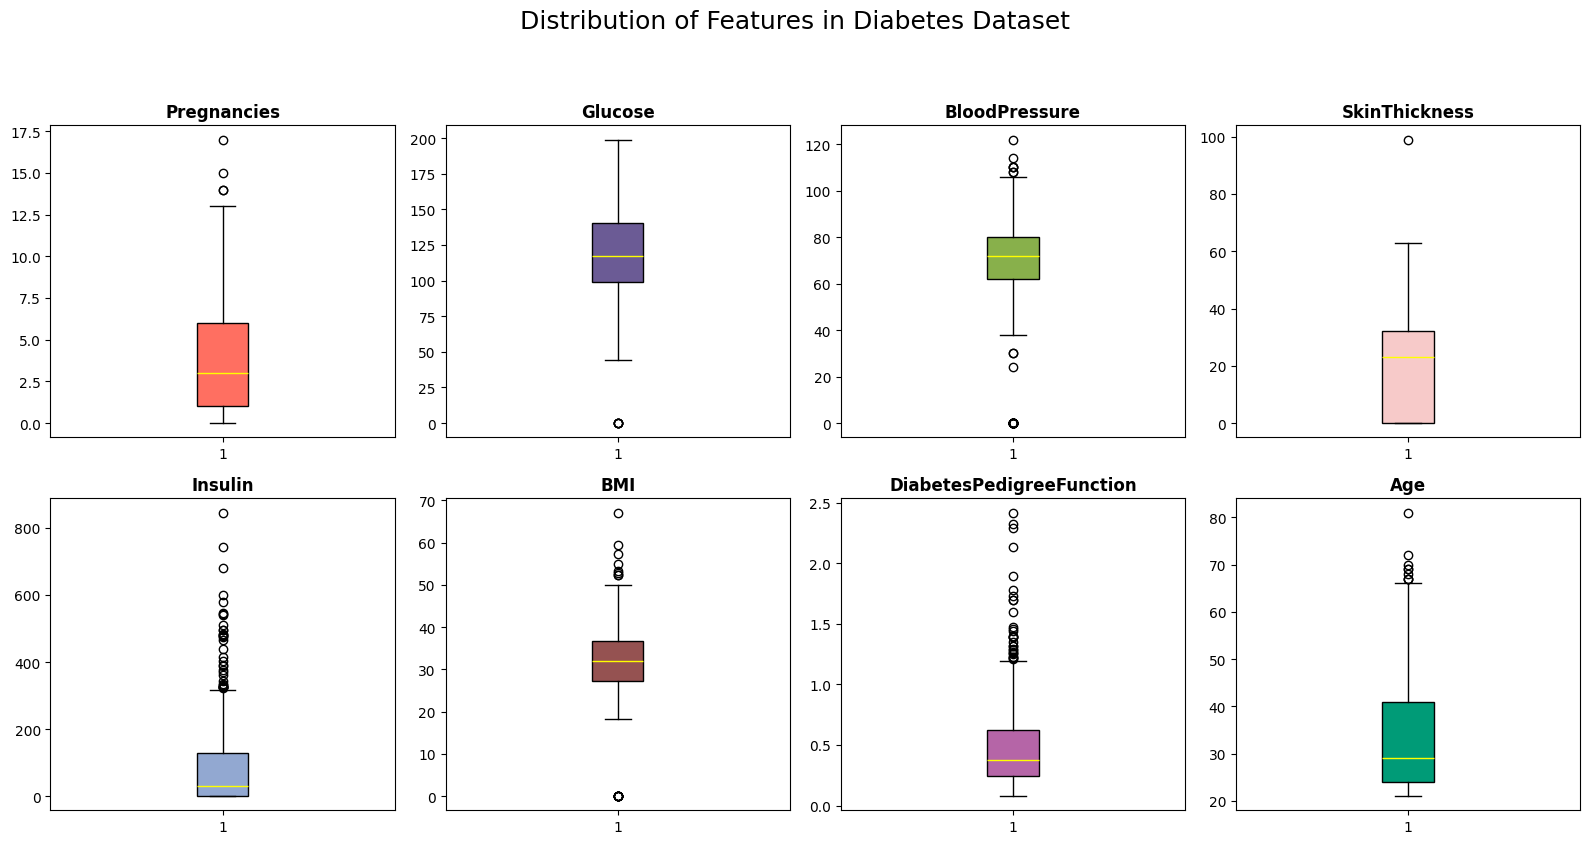

In [68]:
import matplotlib.pyplot as plt

# Define a 2x4 grid (8 features + Outcome = 9 plots, last one will be empty)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# List of features and corresponding colors
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
box_colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9',
              '#92A8D1', '#955251', '#B565A7', '#009B77', '#DD4124']

# Plot box plots with custom styling
for i, (feature, color) in enumerate(zip(features, box_colors)):
  if i < len(axes):

    axes[i].boxplot(df[feature], patch_artist=True,
                    boxprops=dict(facecolor=color, color='black'),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'),
                    medianprops=dict(color='yellow'))
    axes[i].set_title(feature, fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='y', labelsize=10)

# Remove the last empty subplot (if any)
if len(features) < len(axes):
    for i in range(len(features), len(axes)):

     fig.delaxes(axes[i])

# Add a main title and adjust layout
fig.suptitle("Distribution of Features in Diabetes Dataset", fontsize=18, y=1.05)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Display the plot
plt.show()

In [69]:
for i in range(len(df.columns)-1):
    for j in range(i+1,len(df.columns)):
        if 0.5<=df[df.columns[i]].corr(df[df.columns[j]]):
            print("We can drop either "+str(df.columns[i])+" or "+str(df.columns[j]))


We can drop either Pregnancies or Age


In [70]:
df.drop(['Pregnancies'], axis=1, inplace=True)

In [71]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [72]:
df.Glucose.describe()

,Glucose
count,768.000000
mean,120.894531
std,31.972618
min,0.000000
25%,99.000000
50%,117.000000
75%,140.250000
max,199.000000


# Dealing with Outliers

In [73]:
Q1 = df.Glucose.quantile(0.25)
Q3 = df.Glucose.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df.loc[df['Glucose']<=lower_limit,'Glucose'] = np.mean(df['Glucose'])
df.loc[df['Glucose']>upper_limit, 'Glucose'] = np.mean(df['Glucose'])

<ipython-input-73-eac62b5255f4>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '120.89453125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Glucose']<=lower_limit,'Glucose'] = np.mean(df['Glucose'])


In [74]:
Q1 = df.BloodPressure.quantile(0.25)
Q3 = df.BloodPressure.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['BloodPressure']<=lower_limit,'BloodPressure'] = np.mean(df['BloodPressure'])
df.loc[df['BloodPressure']>upper_limit,'BloodPressure'] = np.mean(df['BloodPressure'])


<ipython-input-74-05bc0d6b48d4>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '69.10546875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['BloodPressure']<=lower_limit,'BloodPressure'] = np.mean(df['BloodPressure'])


In [75]:
Q1 = df.SkinThickness.quantile(0.25)
Q3 = df.SkinThickness.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['SkinThickness']<=lower_limit,'SkinThickness'] = np.mean(df['SkinThickness'])
df.loc[df['SkinThickness']>upper_limit,'SkinThickness'] = np.mean(df['SkinThickness'])


<ipython-input-75-db7e8323ecee>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20.536458333333332' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['SkinThickness']<=lower_limit,'SkinThickness'] = np.mean(df['SkinThickness'])


In [76]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['Insulin']<=lower_limit,'Insulin'] = np.mean(df['Insulin'])
df.loc[df['Insulin']>upper_limit,'Insulin'] = np.mean(df['Insulin'])


<ipython-input-76-1e0e27264233>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '79.79947916666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Insulin']<=lower_limit,'Insulin'] = np.mean(df['Insulin'])


In [77]:
Q1 = df.BMI.quantile(0.25)
Q3 = df.BMI.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['BMI']<=lower_limit,'BMI'] = np.mean(df['BMI'])
df.loc[df['BMI']>upper_limit,'BMI'] = np.mean(df['BMI'])


In [78]:
Q1 = df.DiabetesPedigreeFunction.quantile(0.25)
Q3 = df.DiabetesPedigreeFunction.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['DiabetesPedigreeFunction']<=lower_limit,'DiabetesPedigreeFunction'] = np.mean(df['DiabetesPedigreeFunction'])
df.loc[df['DiabetesPedigreeFunction']>upper_limit,'DiabetesPedigreeFunction'] = np.mean(df['DiabetesPedigreeFunction'])


In [79]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['Age']<=lower_limit,'Age'] = np.mean(df['Age'])
df.loc[df['Age']>upper_limit,'Age'] = np.mean(df['Age'])


<ipython-input-79-83f02841cb99>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33.240885416666664' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Age']<=lower_limit,'Age'] = np.mean(df['Age'])


In [80]:
Q1 = df.Outcome.quantile(0.25)
Q3 = df.Outcome.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['Outcome']<=lower_limit,'Outcome'] = np.mean(df['Outcome'])
df.loc[df['Outcome']>upper_limit,'Outcome'] = np.mean(df['Outcome'])


<ipython-input-80-99e6526bbbd3>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3489583333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Outcome']<=lower_limit,'Outcome'] = np.mean(df['Outcome'])


<Axes: title={'center': 'Outcome'}>

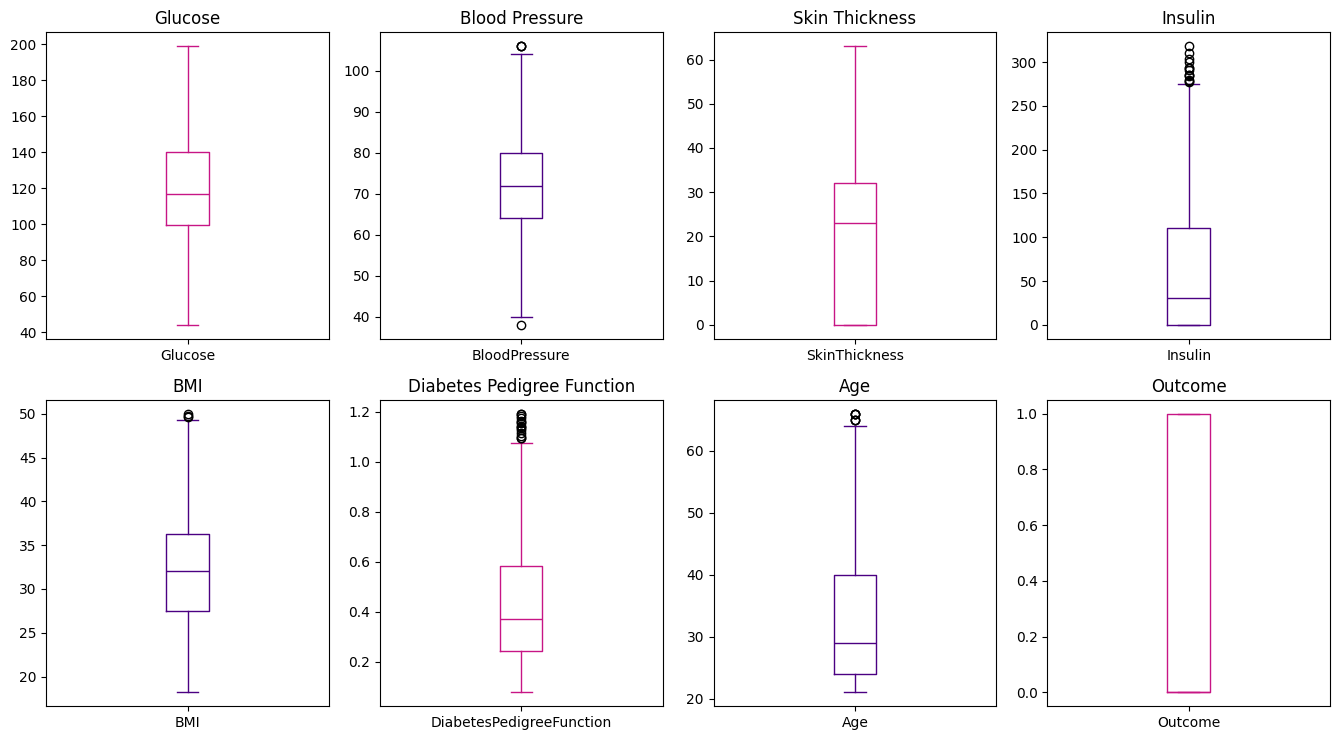

In [81]:
plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(2, 4)

df['Glucose'].plot.box(title="Glucose",ax=axis[0][0],color="MEDIUMVIOLETRED")
df['BloodPressure'].plot.box(title="Blood Pressure",ax=axis[0][1],color="INDIGO")
df['SkinThickness'].plot.box(title="Skin Thickness",ax=axis[0][2],color="MEDIUMVIOLETRED")
df['Insulin'].plot.box(title="Insulin",ax=axis[0][3],color="INDIGO")
df['BMI'].plot.box(title="BMI",ax=axis[1][0],color="INDIGO")
df['DiabetesPedigreeFunction'].plot.box(title="Diabetes Pedigree Function",ax=axis[1][1],color="MEDIUMVIOLETRED")
df['Age'].plot.box(title="Age",ax=axis[1][2],color="INDIGO")
df['Outcome'].plot.box(title="Outcome",ax=axis[1][3],color="MEDIUMVIOLETRED")


In [82]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,35.0,0.0,33.6,0.627000,50.0,1.0
1,85.0,66.0,29.0,0.0,26.6,0.351000,31.0,0.0
2,183.0,64.0,0.0,0.0,23.3,0.672000,32.0,1.0
3,89.0,66.0,23.0,94.0,28.1,0.167000,21.0,0.0
4,137.0,40.0,35.0,168.0,43.1,0.471876,33.0,1.0
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171000,63.0,0.0
764,122.0,70.0,27.0,0.0,36.8,0.340000,27.0,0.0
765,121.0,72.0,23.0,112.0,26.2,0.245000,30.0,0.0
766,126.0,60.0,0.0,0.0,30.1,0.349000,47.0,1.0


# Feature Engineering

In [83]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [84]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"


In [85]:
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))


In [86]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]


In [87]:
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)


In [88]:
df.head()


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,148.0,72.0,35.0,0.0,33.6,0.627000,50.0,1.0,True,False,False,False,False,False,False,False,False,True
1,85.0,66.0,29.0,0.0,26.6,0.351000,31.0,0.0,False,False,False,True,False,False,False,True,False,False
2,183.0,64.0,0.0,0.0,23.3,0.672000,32.0,1.0,False,False,False,False,False,False,False,False,False,True
3,89.0,66.0,23.0,94.0,28.1,0.167000,21.0,0.0,False,False,False,True,False,True,False,True,False,False
4,137.0,40.0,35.0,168.0,43.1,0.471876,33.0,1.0,False,False,True,False,False,False,False,False,False,True


In [89]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]


In [90]:
Y = df["Outcome"]
X = df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index


# Data Standardization

In [91]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,148.0,72.0,35.0,0.0,33.6,0.627000,50.0,1.0,True,False,False,False,False,False,False,False,False,True
1,85.0,66.0,29.0,0.0,26.6,0.351000,31.0,0.0,False,False,False,True,False,False,False,True,False,False
2,183.0,64.0,0.0,0.0,23.3,0.672000,32.0,1.0,False,False,False,False,False,False,False,False,False,True
3,89.0,66.0,23.0,94.0,28.1,0.167000,21.0,0.0,False,False,False,True,False,True,False,True,False,False
4,137.0,40.0,35.0,168.0,43.1,0.471876,33.0,1.0,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171000,63.0,0.0,True,False,False,False,False,False,False,False,True,False
764,122.0,70.0,27.0,0.0,36.8,0.340000,27.0,0.0,False,True,False,False,False,False,False,False,True,False
765,121.0,72.0,23.0,112.0,26.2,0.245000,30.0,0.0,False,False,False,True,False,True,False,False,True,False
766,126.0,60.0,0.0,0.0,30.1,0.349000,47.0,1.0,True,False,False,False,False,False,False,False,True,False


In [92]:
from sklearn.preprocessing import StandardScaler # Importing the StandardScaler class from sklearn.preprocessing

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)


In [93]:
df_scaled = pd.concat([X_scaled, Y], axis=1)
df_scaled


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.865276,-0.005124,0.928458,-0.815354,0.217978,0.798645,1.556957,1.0
1,-1.205989,-0.542772,0.546002,-0.815354,-0.874679,-0.328392,-0.163949,0.0
2,2.015979,-0.721988,-1.302538,-0.815354,-1.389789,0.982401,-0.073375,1.0
3,-1.074480,-0.542772,0.163545,0.399244,-0.640538,-1.079749,-1.069690,0.0
4,0.503626,-2.872582,0.928458,1.355416,1.700869,0.165203,0.017199,1.0
...,...,...,...,...,...,...,...,...
763,-0.679954,0.353308,1.757114,1.510471,0.108712,-1.063415,2.734419,0.0
764,0.010468,-0.184340,0.418516,-0.815354,0.717478,-0.373310,-0.526245,0.0
765,-0.022409,-0.005124,0.163545,0.631826,-0.937117,-0.761239,-0.254523,0.0
766,0.141977,-1.080421,-1.302538,-0.815354,-0.328351,-0.336558,1.285235,1.0


In [95]:
X = pd.concat([X_scaled,categorical_df], axis = 1)

##Train-Test Data Split

In [96]:
from sklearn.model_selection import train_test_split # Importing the train_test_split function

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.66, shuffle=True)


#Implementing **Models**

In [97]:
from sklearn import metrics
from sklearn.metrics import classification_report


### Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
target_names = ['non-diabetes', 'diabetes']
print(classification_report(Y_test, Y_pred, target_names=target_names))


              precision    recall  f1-score   support

non-diabetes       0.85      0.84      0.85       183
    diabetes       0.64      0.66      0.65        79

    accuracy                           0.79       262
   macro avg       0.75      0.75      0.75       262
weighted avg       0.79      0.79      0.79       262



### K-Nearest Neighbour

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
target_names = ['non-diabetes', 'diabetes']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-diabetes       0.82      0.81      0.82       183
    diabetes       0.57      0.59      0.58        79

    accuracy                           0.74       262
   macro avg       0.70      0.70      0.70       262
weighted avg       0.75      0.74      0.75       262



### Decision Tree Classifier

In [100]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
Y_pred = DT.predict(X_test)
target_names = ['non-diabetes', 'diabetes']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-diabetes       0.79      0.80      0.79       183
    diabetes       0.52      0.51      0.51        79

    accuracy                           0.71       262
   macro avg       0.65      0.65      0.65       262
weighted avg       0.71      0.71      0.71       262



### Support Vector Classifier

In [101]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf',C = 10, class_weight='balanced')
SVM.fit(X_train, Y_train)
Y_pred = SVM.predict(X_test)
target_names = ['non-diabetes', 'diabetes']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-diabetes       0.86      0.80      0.83       183
    diabetes       0.60      0.70      0.65        79

    accuracy                           0.77       262
   macro avg       0.73      0.75      0.74       262
weighted avg       0.78      0.77      0.78       262



In [102]:
from sklearn.ensemble import GradientBoostingClassifier # Importing GradientBoostingClassifier from sklearn.ensemble
xgb = GradientBoostingClassifier(random_state = 12345)
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)
target_names = ['non-diabetes', 'diabetes']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-diabetes       0.83      0.84      0.83       183
    diabetes       0.62      0.61      0.61        79

    accuracy                           0.77       262
   macro avg       0.72      0.72      0.72       262
weighted avg       0.77      0.77      0.77       262



#HyperParameter Tuning

In [117]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

# Define model
model = SVC()

# Define parameter grid
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1]},
    {'kernel': ['poly'], 'C': [0.1, 1], 'gamma': ['scale'], 'degree': [2, 3]}
]

# Define cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1, error_score=0)
grid.fit(X_train, Y_train)

# Summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.669660 using {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.645463 (0.093899) with: {'C': 0.1, 'kernel': 'linear'}
0.649115 (0.094026) with: {'C': 1, 'kernel': 'linear'}
0.650667 (0.103556) with: {'C': 10, 'kernel': 'linear'}
0.568980 (0.086469) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.010175 (0.030536) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.611683 (0.093023) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.669660 (0.080765) with: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.642947 (0.088863) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.666879 (0.079697) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.631281 (0.065081) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.650876 (0.104091) with: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.638735 (0.064467) with: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.390311 (0.121855) with: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
0.426648 (0.136891) with: {'C': 0.1, 'degree': 3, 'gamma': 'sca

In [105]:
from sklearn.model_selection import GridSearchCV # Importing GridSearchCV
param_grid = {'C': [5, 10,100],
    'gamma': ['scale', 0.01, 0.1],
}
grid = GridSearchCV(SVM, param_grid, cv=5, scoring='f1')
grid.fit(X_train, Y_train)

# Best model
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 100, 'gamma': 0.01}


In [106]:
from sklearn.model_selection import GridSearchCV # Importing GridSearchCV
param_grid = {'C': [10,100,150],
    'gamma': ['scale', 0.01, 0.1],
}
grid = GridSearchCV(SVM, param_grid, cv=5, scoring='f1')
grid.fit(X_train, Y_train)

# Best model
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 100, 'gamma': 0.01}


In [118]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf',C = 1, class_weight='balanced')
SVM.fit(X_train, Y_train)
Y_pred = SVM.predict(X)
target_names = ['non-diabetes', 'diabetes']
print(classification_report(Y, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-diabetes       0.90      0.78      0.83       500
    diabetes       0.67      0.84      0.74       268

    accuracy                           0.80       768
   macro avg       0.78      0.81      0.79       768
weighted avg       0.82      0.80      0.80       768



In [125]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf',C = 10, class_weight='balanced')
SVM.fit(X_train, Y_train)
Y_pred = SVM.predict(X)
target_names = ['non-diabetes', 'diabetes']
print(classification_report(Y, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-diabetes       0.93      0.87      0.90       500
    diabetes       0.78      0.87      0.82       268

    accuracy                           0.87       768
   macro avg       0.85      0.87      0.86       768
weighted avg       0.88      0.87      0.87       768



In [136]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf',C = 100, class_weight='balanced')
SVM.fit(X_train, Y_train)
Y_pred = SVM.predict(X)
target_names = ['non-diabetes', 'diabetes']
print(classification_report(Y, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-diabetes       0.93      0.91      0.92       500
    diabetes       0.83      0.87      0.85       268

    accuracy                           0.89       768
   macro avg       0.88      0.89      0.88       768
weighted avg       0.89      0.89      0.89       768



##Result Evaluation

In [112]:
Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])


In [113]:
df_new = pd.read_csv('/content/diabetes.csv')


In [114]:
df_results = pd.concat([df_new, Y_pred], axis=1)
df_results

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Y_pred
0,6,148,72,35,0,33.6,0.627,50,1,1.0
1,1,85,66,29,0,26.6,0.351,31,0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,1.0
3,1,89,66,23,94,28.1,0.167,21,0,0.0
4,0,137,40,35,168,43.1,2.288,33,1,1.0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0.0
764,2,122,70,27,0,36.8,0.340,27,0,1.0
765,5,121,72,23,112,26.2,0.245,30,0,0.0
766,1,126,60,0,0,30.1,0.349,47,1,1.0


## Results Visualization

<Axes: title={'center': 'Predicted'}, xlabel='Glucose', ylabel='DiabetesPedigreeFunction'>

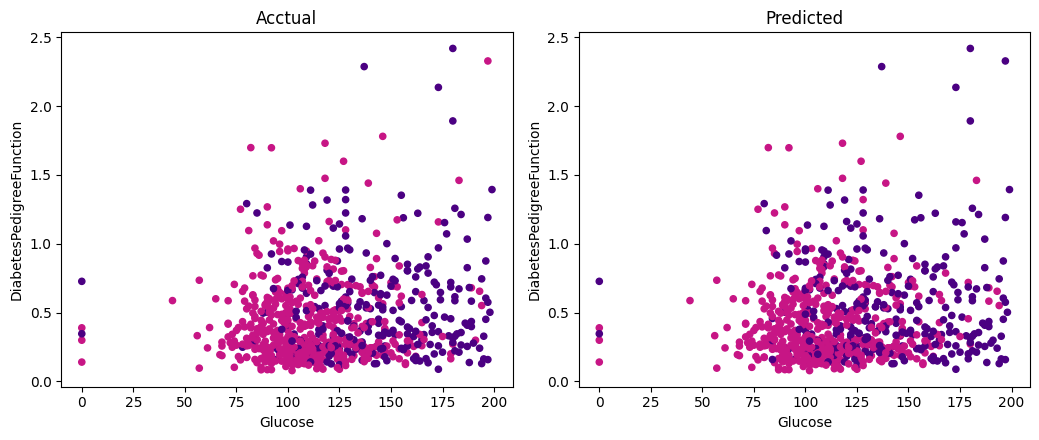

In [115]:
plt.rcParams["figure.figsize"] = [10.50, 4.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)

colors = {0:'MEDIUMVIOLETRED', 1:'INDIGO'}

df_results.plot.scatter("Glucose","DiabetesPedigreeFunction",title="Acctual",ax=axis[0],c=df_results['Outcome'].map(colors))
df_results.plot.scatter("Glucose","DiabetesPedigreeFunction",title="Predicted",ax=axis[1],c=df_results['Y_pred'].map(colors))
